#### PREDICTION PROFIT STARTUP

In [131]:
# --- Importation des bibliothèques principales ---
import pandas as pd                    # Manipulation de données tabulaires
import numpy as np                     # Calculs numériques et algèbre linéaire
import matplotlib.pyplot as plt        # Visualisations statiques
import seaborn as sns                  # Visualisations statistiques avancées
from io import StringIO                # Lecture de chaînes comme fichiers
import warnings                        # Gestion des avertissements

# --- Bibliothèques de Machine Learning (scikit-learn) ---
from sklearn.model_selection import train_test_split  # Division train/test
from sklearn.compose import ColumnTransformer         # Préprocessing par colonnes
from sklearn.preprocessing import OneHotEncoder       # Encodage variables catégorielles
from sklearn.linear_model import LinearRegression     # Modèle de régression linéaire
from sklearn.pipeline import Pipeline                 # Pipeline de transformations
from sklearn.metrics import (                         # Métriques d'évaluation
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    mean_absolute_percentage_error
)

# --- Configuration de l'affichage ---
pd.set_option('display.max_columns', None)           # Afficher toutes les colonnes
pd.set_option('display.width', 1000)                 # Largeur d'affichage
pd.set_option('display.float_format', '{:.2f}'.format)  # Format des nombres flottants
warnings.filterwarnings('ignore')                     # Masquer les warnings

# Configuration pour Jupyter
%matplotlib inline

# Style des graphiques
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.1)
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [132]:
df=pd.read_csv("50_Startups.csv", sep=',')

In [133]:
## verification des dimentions de notre jeux de donnees

df.shape

(50, 5)

In [134]:
## verification des colones existantes

df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [135]:
## verification du type de colones

df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [136]:
## visualiser les 5 premiere ligne de notre jeux de donnees

df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [137]:
## verification des valeur (null , duplicate)
df_NULL=df.isna().sum()
df_Duplicated=df.duplicated().sum()
print(f"les valeur null sont{df_NULL}, et les valeur dupliquees son {df_Duplicated}" )

les valeur null sontR&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64, et les valeur dupliquees son 0


In [138]:
## verification des statistiques descriptives
 
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.00,50.00,50.00,50.00
mean,73721.62,121344.64,211025.10,112012.64
std,45902.26,28017.80,122290.31,40306.18
min,0.00,51283.14,0.00,14681.40
25%,39936.37,103730.88,129300.13,90138.90
50%,73051.08,122699.79,212716.24,107978.19
75%,101602.80,144842.18,299469.08,139765.98
max,165349.20,182645.56,471784.10,192261.83


In [139]:
## annalyse de la variable categoriel state

state_distribution= df["State"].value_counts()
print(state_distribution)

State
New York      17
California    17
Florida       16
Name: count, dtype: int64


In [140]:
## profit moyen par etat 

Profit_ByState=df.groupby("State")["Profit"].agg(["mean","median","std","min","max"])
print(Profit_ByState)

                mean    median      std      min       max
State                                                     
California 103905.18  97427.84 44446.36 14681.40 191792.06
Florida    118774.02 109543.12 35605.47 49490.75 191050.39
New York   113756.45 108552.04 41140.26 35673.41 192261.83


In [141]:
## Detection des outliers

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)   # 1er quartile
    Q3 = df[column].quantile(0.75)   # 3e quartile
    IQR = Q3 - Q1                    # Écart interquartile
    lower_bound = Q1 - 1.5 * IQR     # Borne inférieure
    upper_bound = Q3 + 1.5 * IQR     # Borne supérieure
    
    # Identification des outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Borne inf.': lower_bound,
        'Borne sup.': upper_bound,
        'Nb outliers': len(outliers),
        'Indices': list(outliers.index)
    }

# Application sur les colonnes numériques
numeric_cols = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

for col in numeric_cols:
    res = detect_outliers_iqr(df, col)
    print(f"\n{col}:")
    print(f"  Q1           : {res['Q1']:.2f}")
    print(f"  Q3           : {res['Q3']:.2f}")
    print(f"  IQR          : {res['IQR']:.2f}")
    print(f"  Borne inf.   : {res['Borne inf.']:.2f}")
    print(f"  Borne sup.   : {res['Borne sup.']:.2f}")
    print(f"  Nb outliers  : {res['Nb outliers']}")
    if res['Nb outliers'] > 0:
        print(f"  Indices      : {res['Indices']}")
        # Affichage des valeurs aberrantes
        print("  Valeurs aberrantes :")
        print(df.loc[res['Indices'], col])


R&D Spend:
  Q1           : 39936.37
  Q3           : 101602.80
  IQR          : 61666.43
  Borne inf.   : -52563.28
  Borne sup.   : 194102.45
  Nb outliers  : 0

Administration:
  Q1           : 103730.88
  Q3           : 144842.18
  IQR          : 41111.30
  Borne inf.   : 42063.92
  Borne sup.   : 206509.14
  Nb outliers  : 0

Marketing Spend:
  Q1           : 129300.13
  Q3           : 299469.08
  IQR          : 170168.95
  Borne inf.   : -125953.30
  Borne sup.   : 554722.51
  Nb outliers  : 0

Profit:
  Q1           : 90138.90
  Q3           : 139765.98
  IQR          : 49627.07
  Borne inf.   : 15698.29
  Borne sup.   : 214206.59
  Nb outliers  : 1
  Indices      : [49]
  Valeurs aberrantes :
49   14681.40
Name: Profit, dtype: float64


In [142]:
# Copie du dataset pour ne pas modifier l'original immédiatement
data_clean = df.copy()

print("\nApplication du capping sur les colonnes numériques :\n")

for col in numeric_cols:  # ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']
    Q1 = data_clean[col].quantile(0.25)
    Q3 = data_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Compter combien de valeurs vont être modifiées
    nb_lower = (data_clean[col] < lower_bound).sum()
    nb_upper = (data_clean[col] > upper_bound).sum()
    
    # Appliquer le capping
    data_clean[col] = data_clean[col].clip(lower=lower_bound, upper=upper_bound)
    
    print(f"{col:20} :")
    print(f"  → Borne inférieure appliquée : {lower_bound:.2f} ({nb_lower} valeur(s) corrigée(s))")
    print(f"  → Borne supérieure appliquée : {upper_bound:.2f} ({nb_upper} valeur(s) corrigée(s))")

print("\nCapping terminé ! Les outliers extrêmes ont été ramenés aux bornes IQR.")
print("Le dataset modifié est stocké dans la variable 'data_clean'.")


Application du capping sur les colonnes numériques :

R&D Spend            :
  → Borne inférieure appliquée : -52563.28 (0 valeur(s) corrigée(s))
  → Borne supérieure appliquée : 194102.45 (0 valeur(s) corrigée(s))
Administration       :
  → Borne inférieure appliquée : 42063.92 (0 valeur(s) corrigée(s))
  → Borne supérieure appliquée : 206509.14 (0 valeur(s) corrigée(s))
Marketing Spend      :
  → Borne inférieure appliquée : -125953.30 (0 valeur(s) corrigée(s))
  → Borne supérieure appliquée : 554722.51 (0 valeur(s) corrigée(s))
Profit               :
  → Borne inférieure appliquée : 15698.29 (1 valeur(s) corrigée(s))
  → Borne supérieure appliquée : 214206.59 (0 valeur(s) corrigée(s))

Capping terminé ! Les outliers extrêmes ont été ramenés aux bornes IQR.
Le dataset modifié est stocké dans la variable 'data_clean'.


In [143]:
## verification apres la corection outliers 

numeric_cols = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

for col in numeric_cols:
    res = detect_outliers_iqr(data_clean, col)
    print(f"\n{col}:")
    print(f"  Q1           : {res['Q1']:.2f}")
    print(f"  Q3           : {res['Q3']:.2f}")
    print(f"  IQR          : {res['IQR']:.2f}")
    print(f"  Borne inf.   : {res['Borne inf.']:.2f}")
    print(f"  Borne sup.   : {res['Borne sup.']:.2f}")
    print(f"  Nb outliers  : {res['Nb outliers']}")
    if res['Nb outliers'] > 0:
        print(f"  Indices      : {res['Indices']}")
        # Affichage des valeurs aberrantes
        print("  Valeurs aberrantes :")
        print(data_clean.loc[res['Indices'], col])



R&D Spend:
  Q1           : 39936.37
  Q3           : 101602.80
  IQR          : 61666.43
  Borne inf.   : -52563.28
  Borne sup.   : 194102.45
  Nb outliers  : 0

Administration:
  Q1           : 103730.88
  Q3           : 144842.18
  IQR          : 41111.30
  Borne inf.   : 42063.92
  Borne sup.   : 206509.14
  Nb outliers  : 0

Marketing Spend:
  Q1           : 129300.13
  Q3           : 299469.08
  IQR          : 170168.95
  Borne inf.   : -125953.30
  Borne sup.   : 554722.51
  Nb outliers  : 0

Profit:
  Q1           : 90138.90
  Q3           : 139765.98
  IQR          : 49627.07
  Borne inf.   : 15698.29
  Borne sup.   : 214206.59
  Nb outliers  : 0


## VISUALISATION

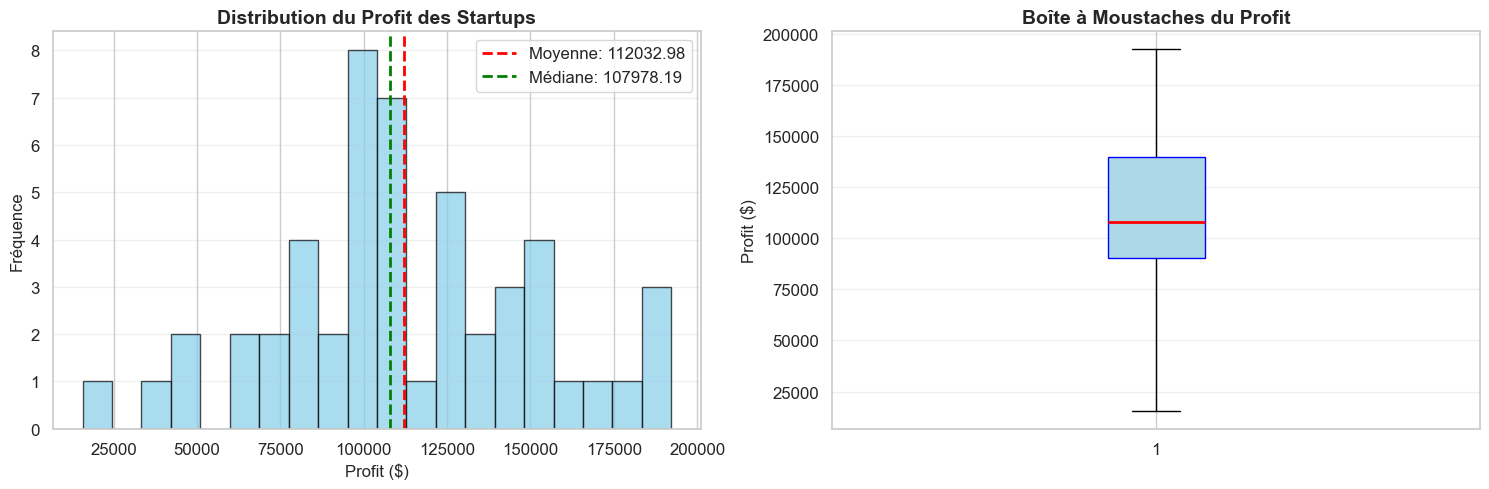

In [144]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogramme avec courbe de densité
axes[0].hist(data_clean['Profit'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(data_clean['Profit'].mean(), color='red', linestyle='--', linewidth=2, label=f'Moyenne: {data_clean["Profit"].mean():.2f}')
axes[0].axvline(data_clean['Profit'].median(), color='green', linestyle='--', linewidth=2, label=f'Médiane: {data_clean["Profit"].median():.2f}')
axes[0].set_xlabel('Profit ($)', fontsize=12)
axes[0].set_ylabel('Fréquence', fontsize=12)
axes[0].set_title('Distribution du Profit des Startups', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Boîte à moustaches
axes[1].boxplot(data_clean['Profit'], vert=True, patch_artist=True, 
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Profit ($)', fontsize=12)
axes[1].set_title('Boîte à Moustaches du Profit', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

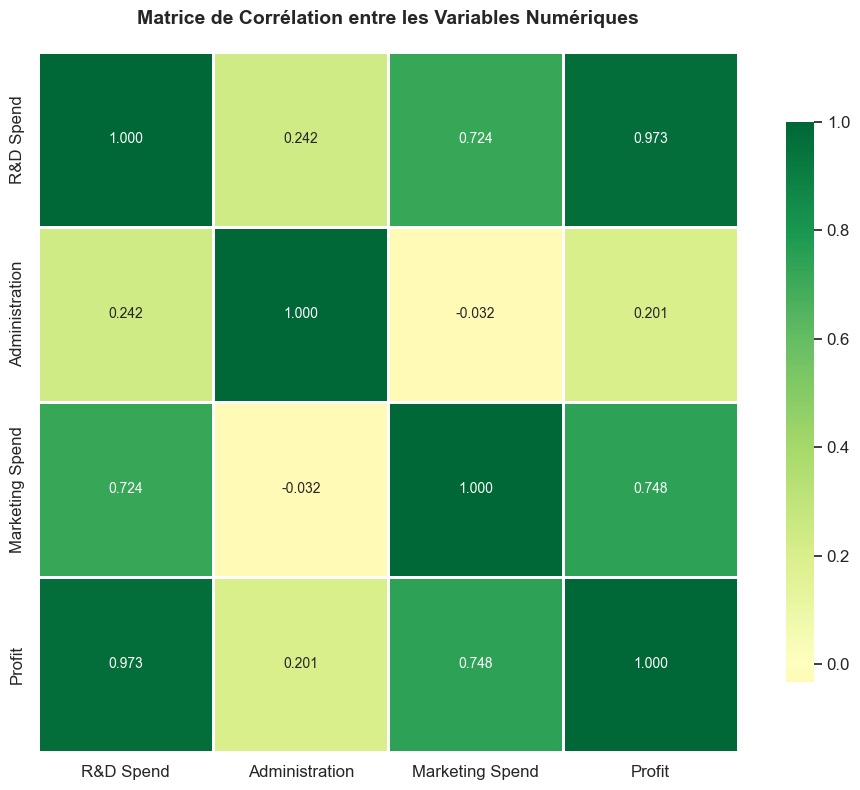


 OBSERVATION CLÉE :
   → R&D Spend a la corrélation la plus forte avec le Profit : 0.973


In [145]:
## matrice de corelation  

numeric_cols = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']
correlation_matrix = data_clean[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', center=0, 
            fmt='.3f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation entre les Variables Numériques', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n OBSERVATION CLÉE :")
print(f"   → R&D Spend a la corrélation la plus forte avec le Profit : {correlation_matrix.loc['R&D Spend', 'Profit']:.3f}")

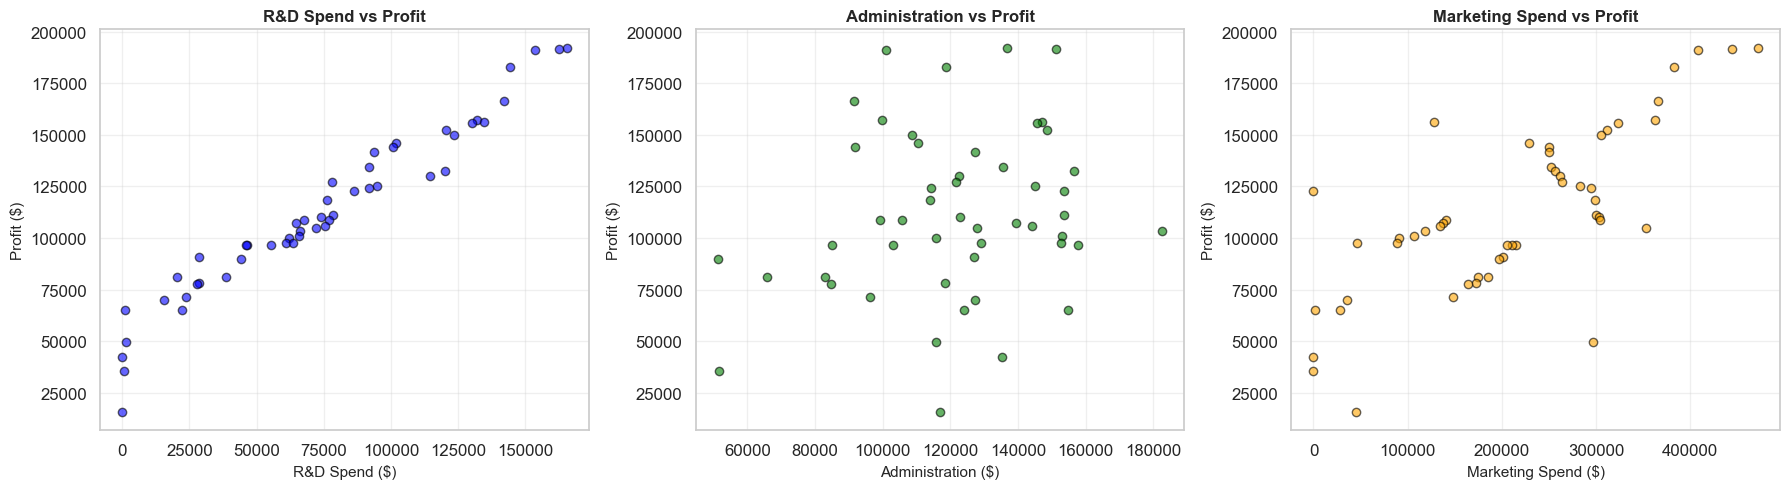

In [146]:
## NUAGE DE POINT

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# R&D Spend vs Profit
axes[0].scatter(data_clean['R&D Spend'], data_clean['Profit'], alpha=0.6, color='blue', edgecolor='black')
axes[0].set_xlabel('R&D Spend ($)', fontsize=11)
axes[0].set_ylabel('Profit ($)', fontsize=11)
axes[0].set_title('R&D Spend vs Profit', fontsize=12, fontweight='bold')
axes[0].grid(alpha=0.3)

# Administration vs Profit
axes[1].scatter(data_clean['Administration'], data_clean['Profit'], alpha=0.6, color='green', edgecolor='black')
axes[1].set_xlabel('Administration ($)', fontsize=11)
axes[1].set_ylabel('Profit ($)', fontsize=11)
axes[1].set_title('Administration vs Profit', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3)

# Marketing Spend vs Profit
axes[2].scatter(data_clean['Marketing Spend'], data_clean['Profit'], alpha=0.6, color='orange', edgecolor='black')
axes[2].set_xlabel('Marketing Spend ($)', fontsize=11)
axes[2].set_ylabel('Profit ($)', fontsize=11)
axes[2].set_title('Marketing Spend vs Profit', fontsize=12, fontweight='bold')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

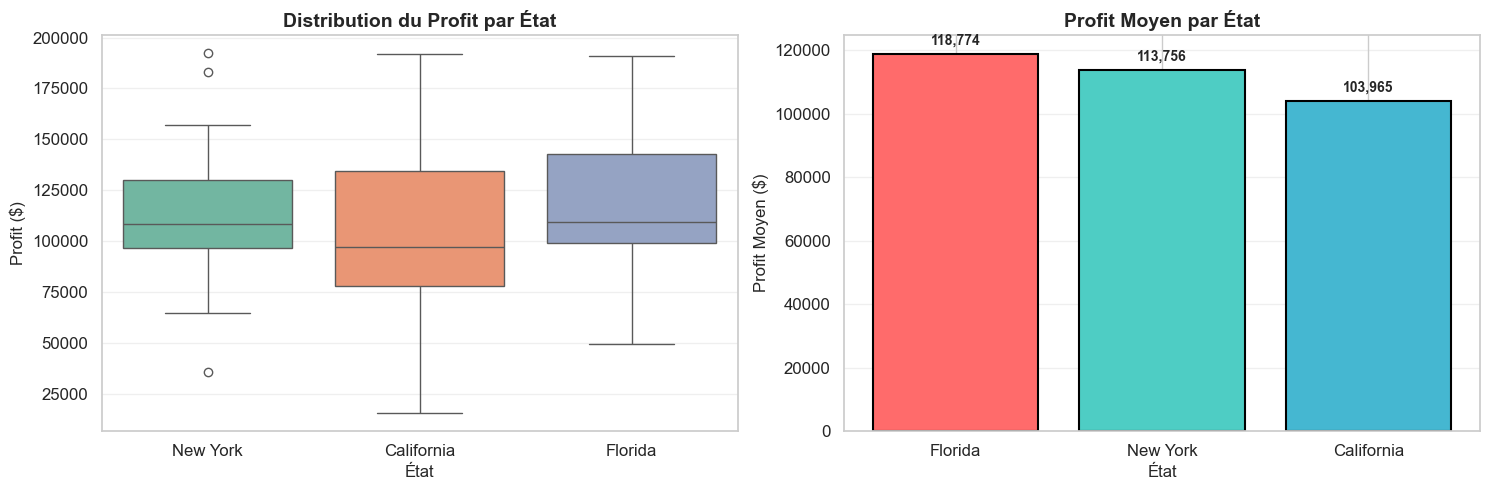

In [147]:
## profit efectuer par Etat

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Boîtes à moustaches par État
sns.boxplot(x='State', y='Profit', data=data_clean, ax=axes[0], palette='Set2')
axes[0].set_xlabel('État', fontsize=12)
axes[0].set_ylabel('Profit ($)', fontsize=12)
axes[0].set_title('Distribution du Profit par État', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Graphique en barres des moyennes
profit_means = data_clean.groupby('State')['Profit'].mean().sort_values(ascending=False)
axes[1].bar(profit_means.index, profit_means.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'], 
            edgecolor='black', linewidth=1.5)
axes[1].set_xlabel('État', fontsize=12)
axes[1].set_ylabel('Profit Moyen ($)', fontsize=12)
axes[1].set_title('Profit Moyen par État', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Ajout des valeurs sur les barres
for i, v in enumerate(profit_means.values):
    axes[1].text(i, v + 2000, f'{v:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### prepation des donnees pour le machine learning



In [148]:
## separation en feature et target 
X=data_clean.drop("Profit",axis=1)
y=data_clean["Profit"]

In [149]:
## encodage de la variable categoriel State

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), ['State'])
    ],
    remainder='passthrough'  # Garder les autres colonnes (numériques) telles quelles
)

# Division
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% pour le test
    random_state=42     # Reproductibilité
)



In [150]:
##  modelisation de la regretion lineaire 

# Création du modèle
model = LinearRegression()

# Création du pipeline complet : Preprocessing → Modèle
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Étape 1 : Encodage de 'State'
    ('model', model)                 # Étape 2 : Régression linéaire
])

print("✓ Pipeline créé avec succès !")
print("  Étape 1 : Préprocessing (OneHotEncoder)")
print("  Étape 2 : Modèle (LinearRegression)")


# --- 6.2 Entraînement du modèle ---
print("\n" + "-" * 80)
print("6.2 ENTRAÎNEMENT DU MODÈLE")
print("-" * 80)

print(" Entraînement en cours...")

# Entraînement
pipeline.fit(X_train, y_train)

print("✓ Modèle entraîné avec succès !")
print(f"  → Nombre d'observations utilisées : {X_train.shape[0]}")
print(f"  → Nombre de features : {X_train.shape[1]} (avant encodage)")

✓ Pipeline créé avec succès !
  Étape 1 : Préprocessing (OneHotEncoder)
  Étape 2 : Modèle (LinearRegression)

--------------------------------------------------------------------------------
6.2 ENTRAÎNEMENT DU MODÈLE
--------------------------------------------------------------------------------
 Entraînement en cours...
✓ Modèle entraîné avec succès !
  → Nombre d'observations utilisées : 40
  → Nombre de features : 4 (avant encodage)


In [151]:
## evaluation des performance du model


y_pred_train = pipeline.predict(X_train)  # Prédictions sur TRAIN
y_pred_test = pipeline.predict(X_test)    # Prédictions sur TEST

print("✓ Prédictions générées avec succès !")
print(f"  → {len(y_pred_train)} prédictions sur l'ensemble TRAIN")
print(f"  → {len(y_pred_test)} prédictions sur l'ensemble TEST")


# --- 7.2 Calcul des métriques de performance ---
print("\n" + "-" * 80)
print("7.2 CALCUL DES MÉTRIQUES DE PERFORMANCE")
print("-" * 80)

print("""
💡 MÉTRIQUES D'ÉVALUATION
-------------------------
- R² (R-squared) : Coefficient de détermination (0 à 1, plus proche de 1 = meilleur)
                   Indique le % de variance expliquée par le modèle
                   
- RMSE (Root Mean Squared Error) : Erreur quadratique moyenne
                                    Pénalise fortement les grandes erreurs
                                    Même unité que la variable cible ($)
                                    
- MAE (Mean Absolute Error) : Erreur absolue moyenne
                               Moyenne des erreurs en valeur absolue
                               Moins sensible aux outliers que RMSE
                               
- MAPE (Mean Absolute Percentage Error) : Erreur en pourcentage
                                          Facilite la comparaison entre datasets
""")

# Calcul des métriques sur TRAIN
r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train) * 100

# Calcul des métriques sur TEST
r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test) * 100

# Affichage des résultats
print("\n" + "=" * 80)
print(" PERFORMANCES SUR L'ENSEMBLE D'ENTRAÎNEMENT (TRAIN)")
print("=" * 80)
print(f"R² Score          : {r2_train:.6f} ({r2_train*100:.2f}% de variance expliquée)")
print(f"RMSE              : {rmse_train:,.2f} $")
print(f"MAE               : {mae_train:,.2f} $")
print(f"MAPE              : {mape_train:.2f} %")

print("\n" + "=" * 80)
print(" PERFORMANCES SUR L'ENSEMBLE DE TEST (TEST)")
print("=" * 80)
print(f"R² Score          : {r2_test:.6f} ({r2_test*100:.2f}% de variance expliquée)")
print(f"RMSE              : {rmse_test:,.2f} $")
print(f"MAE               : {mae_test:,.2f} $")
print(f"MAPE              : {mape_test:.2f} %")

print("\n" + "=" * 80)
print(" INTERPRÉTATION DES RÉSULTATS")
print("=" * 80)

if r2_test > 0.9:
    print(" EXCELLENT : Le modèle explique plus de 90% de la variance du Profit !")
elif r2_test > 0.7:
    print(" BON : Le modèle a de bonnes performances prédictives")
elif r2_test > 0.5:
    print("  MOYEN : Le modèle pourrait être amélioré")
else:
    print("✗ FAIBLE : Le modèle a des performances insuffisantes")

# Vérification de l'overfitting
diff_r2 = abs(r2_train - r2_test)
if diff_r2 < 0.05:
    print(" Pas de surapprentissage détecté (différence R² < 5%)")
elif diff_r2 < 0.1:
    print("  Surapprentissage léger détecté (différence R² entre 5% et 10%)")
else:
    print(" ATTENTION : Surapprentissage significatif détecté (différence R² > 10%)")


# --- 7.3 Tableau comparatif des prédictions ---
print("\n" + "-" * 80)
print("7.3 COMPARAISON PRÉDICTIONS VS VALEURS RÉELLES (ENSEMBLE TEST)")
print("-" * 80)

# Création du tableau comparatif
results_df = pd.DataFrame({
    'Valeur Réelle': y_test,
    'Prédiction': y_pred_test,
    'Erreur': y_test - y_pred_test,
    'Erreur Absolue': np.abs(y_test - y_pred_test),
    'Erreur %': (np.abs(y_test - y_pred_test) / y_test * 100)
})

# Tri par erreur absolue décroissante
results_df = results_df.sort_values('Erreur Absolue', ascending=False)

print("\n Top 10 des prédictions avec les plus grandes erreurs :")
display(results_df.head(10))

print("\n Top 10 des prédictions avec les plus petites erreurs :")
display(results_df.tail(10))

print(f"\n Statistiques des erreurs :")
print(f"   - Erreur moyenne : {results_df['Erreur'].mean():,.2f} $")
print(f"   - Erreur médiane : {results_df['Erreur'].median():,.2f} $")
print(f"   - Erreur maximale (sur-estimation) : {results_df['Erreur'].max():,.2f} $")
print(f"   - Erreur maximale (sous-estimation) : {results_df['Erreur'].min():,.2f} $")

✓ Prédictions générées avec succès !
  → 40 prédictions sur l'ensemble TRAIN
  → 10 prédictions sur l'ensemble TEST

--------------------------------------------------------------------------------
7.2 CALCUL DES MÉTRIQUES DE PERFORMANCE
--------------------------------------------------------------------------------

💡 MÉTRIQUES D'ÉVALUATION
-------------------------
- R² (R-squared) : Coefficient de détermination (0 à 1, plus proche de 1 = meilleur)
                   Indique le % de variance expliquée par le modèle

- RMSE (Root Mean Squared Error) : Erreur quadratique moyenne
                                    Pénalise fortement les grandes erreurs
                                    Même unité que la variable cible ($)

- MAE (Mean Absolute Error) : Erreur absolue moyenne
                               Moyenne des erreurs en valeur absolue
                               Moins sensible aux outliers que RMSE

- MAPE (Mean Absolute Percentage Error) : Erreur en pourcentage
         

,Valeur Réelle,Prédiction,Erreur,Erreur Absolue,Erreur %
45,64926.08,46438.09,18487.99,18487.99,28.48
48,35673.41,50998.75,-15325.34,15325.34,42.96
19,122776.86,113136.96,9639.90,9639.90,7.85
13,134307.35,126417.02,7890.33,7890.33,5.87
25,107404.34,100729.27,6675.07,6675.07,6.21
26,105733.54,109765.58,-4032.04,4032.04,3.81
39,81005.76,84704.21,-3698.45,3698.45,4.57
17,125370.37,128738.56,-3368.19,3368.19,2.69
32,97427.84,97702.31,-274.47,274.47,0.28
30,99937.59,99717.23,220.36,220.36,0.22



 Top 10 des prédictions avec les plus petites erreurs :


,Valeur Réelle,Prédiction,Erreur,Erreur Absolue,Erreur %
45,64926.08,46438.09,18487.99,18487.99,28.48
48,35673.41,50998.75,-15325.34,15325.34,42.96
19,122776.86,113136.96,9639.90,9639.90,7.85
13,134307.35,126417.02,7890.33,7890.33,5.87
25,107404.34,100729.27,6675.07,6675.07,6.21
26,105733.54,109765.58,-4032.04,4032.04,3.81
39,81005.76,84704.21,-3698.45,3698.45,4.57
17,125370.37,128738.56,-3368.19,3368.19,2.69
32,97427.84,97702.31,-274.47,274.47,0.28
30,99937.59,99717.23,220.36,220.36,0.22



 Statistiques des erreurs :
   - Erreur moyenne : 1,621.52 $
   - Erreur médiane : -27.06 $
   - Erreur maximale (sur-estimation) : 18,487.99 $
   - Erreur maximale (sous-estimation) : -15,325.34 $



 Génération du graphique Prédictions vs Réelles...


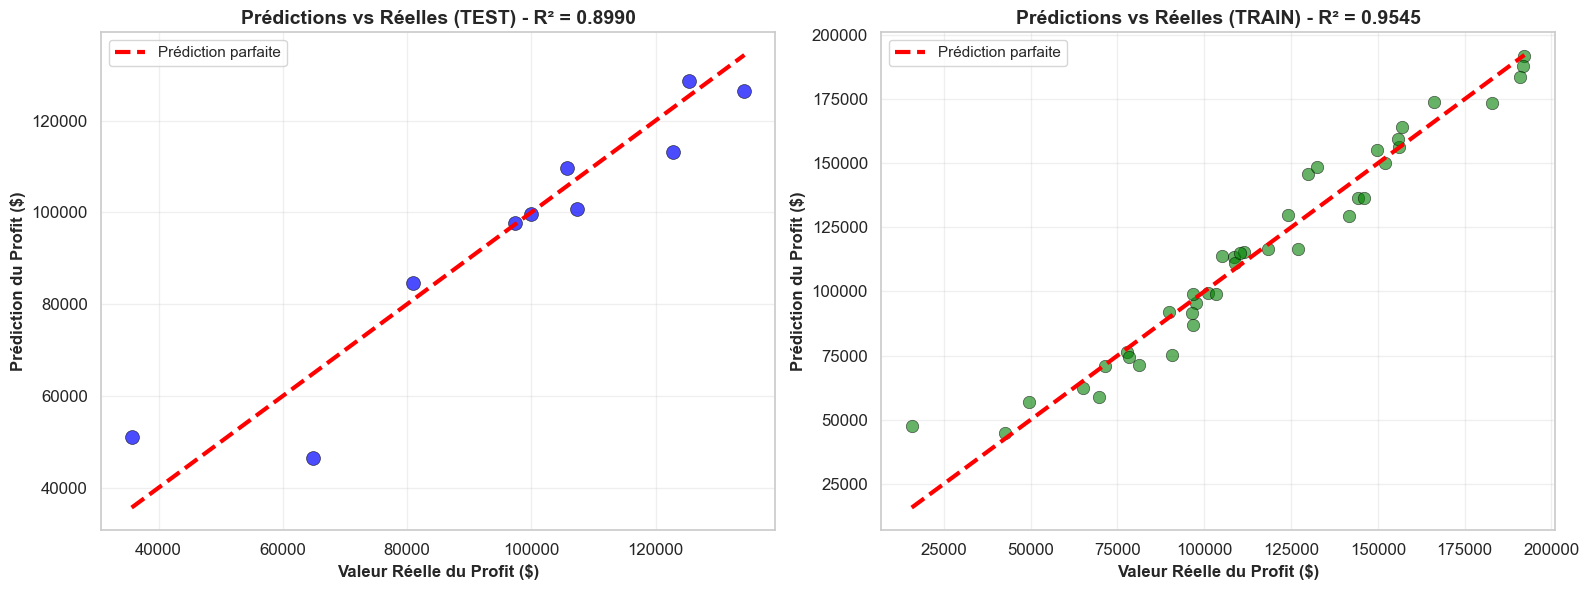


 Analyse des résidus...


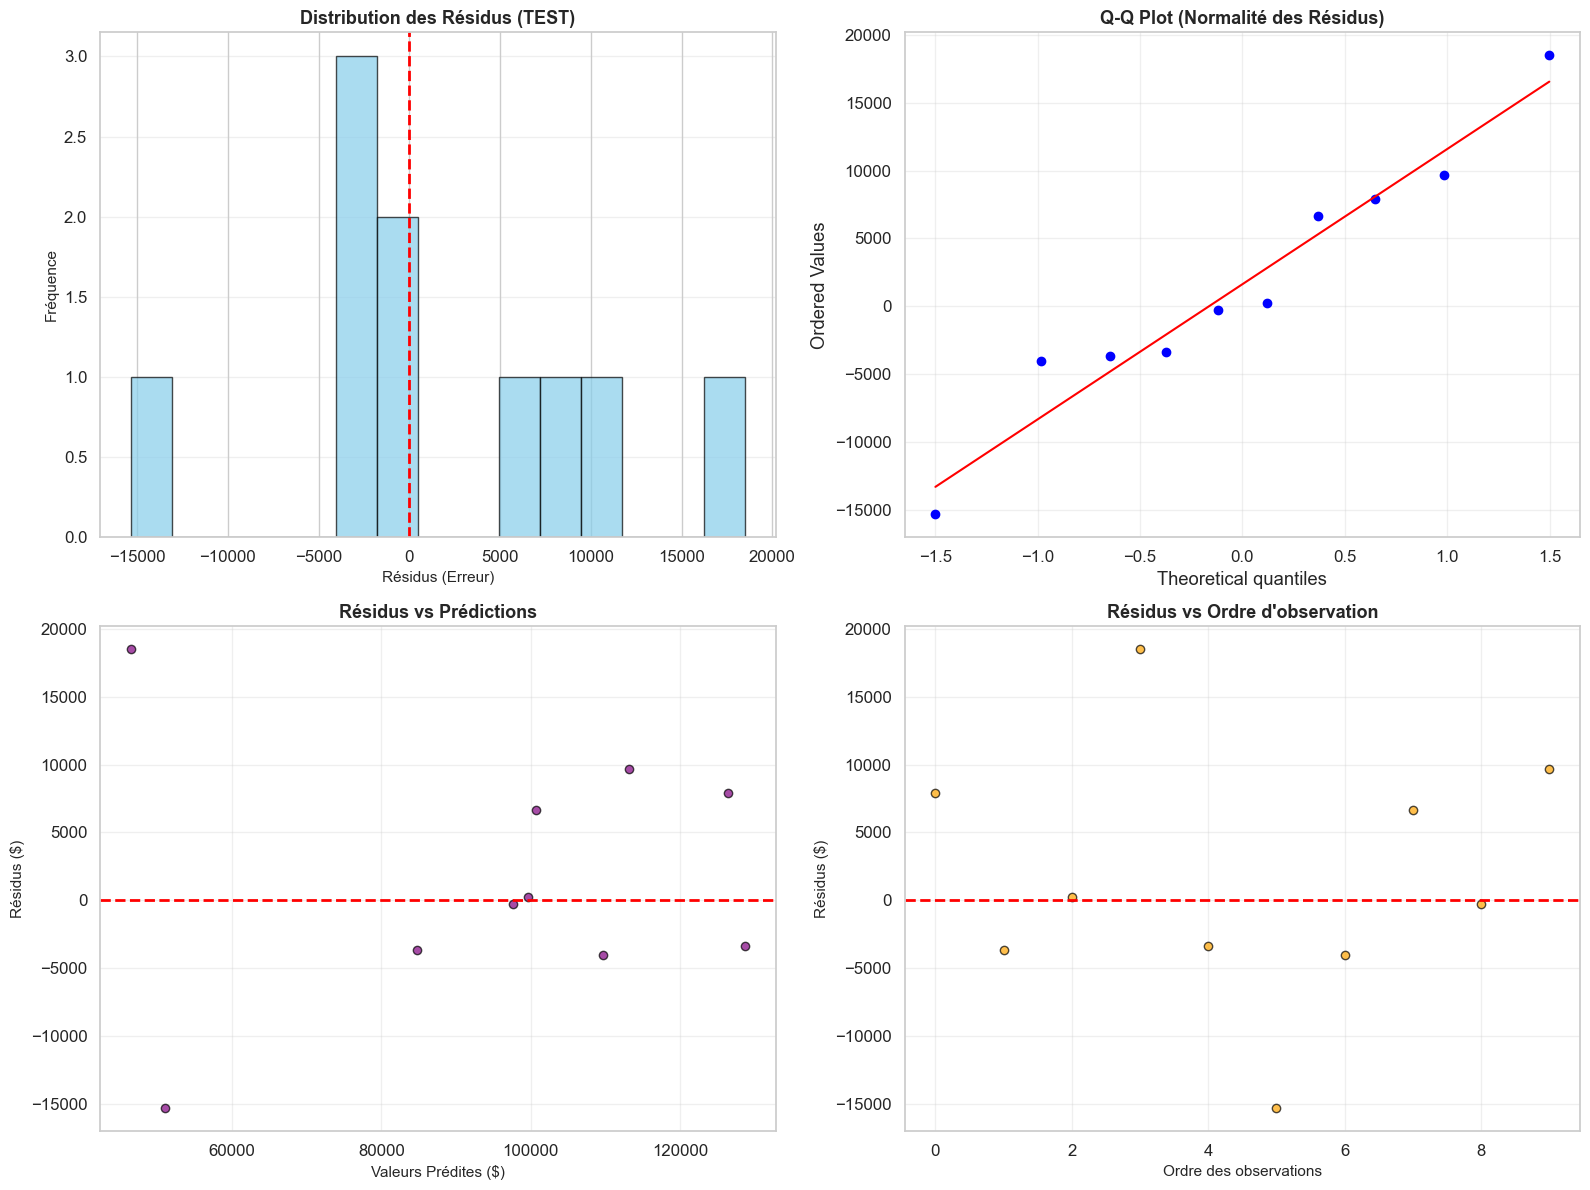


 VÉRIFICATION DES HYPOTHÈSES :
   Les résidus doivent être centrés autour de 0
   Les résidus doivent suivre une distribution normale (Q-Q plot)
   Les résidus doivent avoir une variance constante (homoscédasticité)


In [153]:
###  VISUALISATION DES RESULTATS DU MODEL

print("\n Génération du graphique Prédictions vs Réelles...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Sur l'ensemble TEST
axes[0].scatter(y_test, y_pred_test, alpha=0.7, s=100, color='blue', edgecolor='black', linewidth=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=3, label='Prédiction parfaite')
axes[0].set_xlabel('Valeur Réelle du Profit ($)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Prédiction du Profit ($)', fontsize=12, fontweight='bold')
axes[0].set_title(f'Prédictions vs Réelles (TEST) - R² = {r2_test:.4f}', 
                  fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(alpha=0.3)

# Sur l'ensemble TRAIN
axes[1].scatter(y_train, y_pred_train, alpha=0.6, s=80, color='green', edgecolor='black', linewidth=0.5)
axes[1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
             'r--', lw=3, label='Prédiction parfaite')
axes[1].set_xlabel('Valeur Réelle du Profit ($)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Prédiction du Profit ($)', fontsize=12, fontweight='bold')
axes[1].set_title(f'Prédictions vs Réelles (TRAIN) - R² = {r2_train:.4f}', 
                  fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


# --- 8.2 Distribution des résidus (erreurs) ---
print("\n Analyse des résidus...")

residuals_test = y_test - y_pred_test

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogramme des résidus
axes[0, 0].hist(residuals_test, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Résidus (Erreur)', fontsize=11)
axes[0, 0].set_ylabel('Fréquence', fontsize=11)
axes[0, 0].set_title('Distribution des Résidus (TEST)', fontsize=13, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# Q-Q Plot (normalité des résidus)
from scipy import stats
stats.probplot(residuals_test, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot (Normalité des Résidus)', fontsize=13, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Résidus vs Valeurs Prédites
axes[1, 0].scatter(y_pred_test, residuals_test, alpha=0.7, color='purple', edgecolor='black')
axes[1, 0].axhline(0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Valeurs Prédites ($)', fontsize=11)
axes[1, 0].set_ylabel('Résidus ($)', fontsize=11)
axes[1, 0].set_title('Résidus vs Prédictions', fontsize=13, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Résidus vs Ordre
axes[1, 1].scatter(range(len(residuals_test)), residuals_test, alpha=0.7, color='orange', edgecolor='black')
axes[1, 1].axhline(0, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Ordre des observations', fontsize=11)
axes[1, 1].set_ylabel('Résidus ($)', fontsize=11)
axes[1, 1].set_title('Résidus vs Ordre d\'observation', fontsize=13, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n VÉRIFICATION DES HYPOTHÈSES :")
print("   Les résidus doivent être centrés autour de 0")
print("   Les résidus doivent suivre une distribution normale (Q-Q plot)")
print("   Les résidus doivent avoir une variance constante (homoscédasticité)")


 INTERPRÉTATION DES COEFFICIENTS
----------------------------------
Les coefficients indiquent l'impact de chaque variable sur le Profit :
- Coefficient positif : Augmentation de la variable → Augmentation du Profit
- Coefficient négatif : Augmentation de la variable → Diminution du Profit
- Magnitude : Plus le coefficient est grand (en valeur absolue), plus l'impact est fort


 ORDONNÉE À L'ORIGINE (INTERCEPT) :
   β₀ = 54,177.37 $
   → Profit de base quand toutes les variables valent 0

 COEFFICIENTS DE RÉGRESSION (triés par importance)


,Variable,Coefficient,Impact,Importance
0,State_Florida,881.57,Positif,881.57
1,State_New York,-52.06,Négatif,52.06
2,R&D Spend,0.81,Positif,0.81
3,Administration,-0.07,Négatif,0.07
4,Marketing Spend,0.03,Positif,0.03



 INTERPRÉTATIONS PRATIQUES :
   → State_Florida : +881.57 $ (effet positif comparé à l'état de référence)
   → State_New York : -52.06 $ (effet négatif comparé à l'état de référence)
   → R&D Spend : Chaque $ investi génère +0.8052 $ de profit
   → Administration : Chaque $ investi réduit le profit de 0.0689 $
   → Marketing Spend : Chaque $ investi génère +0.0297 $ de profit

 VARIABLE LA PLUS IMPORTANTE :
   → State_Florida avec un coefficient de 881.5717

 Visualisation de l'importance des variables...


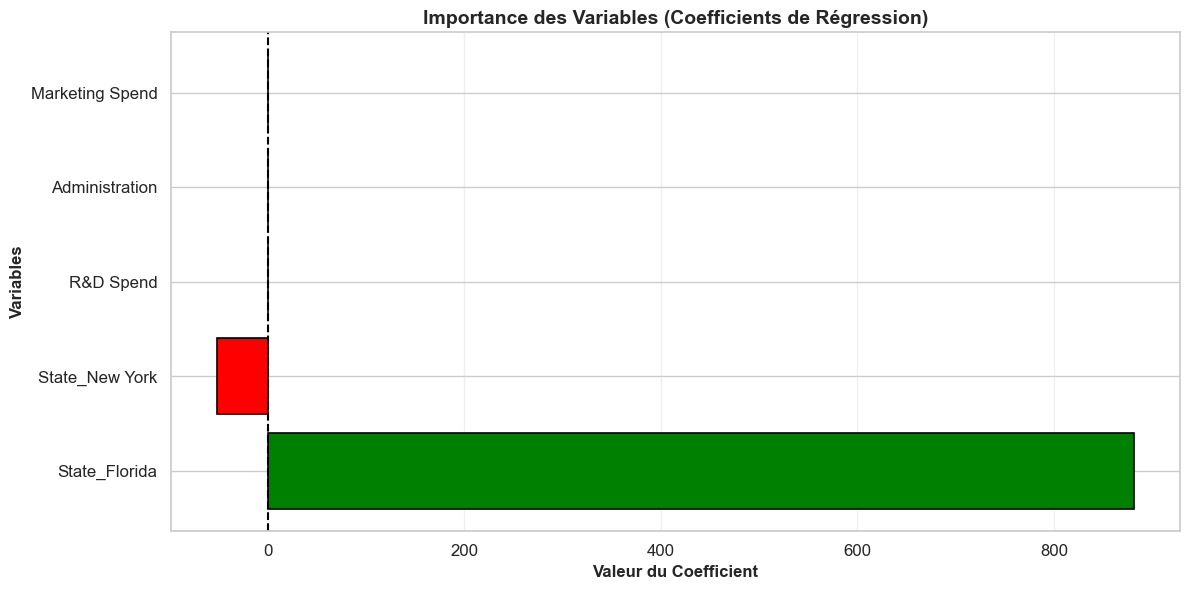

In [154]:
print("""
 INTERPRÉTATION DES COEFFICIENTS
----------------------------------
Les coefficients indiquent l'impact de chaque variable sur le Profit :
- Coefficient positif : Augmentation de la variable → Augmentation du Profit
- Coefficient négatif : Augmentation de la variable → Diminution du Profit
- Magnitude : Plus le coefficient est grand (en valeur absolue), plus l'impact est fort
""")

# Récupération des noms de features après transformation
feature_names_encoded = (pipeline.named_steps['preprocessor']
                        .named_transformers_['cat']
                        .get_feature_names_out(['State']))

# Liste complète des features
remaining_features = [col for col in X.columns if col != 'State']
all_feature_names = list(feature_names_encoded) + remaining_features

# Coefficients du modèle
coefficients = pipeline.named_steps['model'].coef_
intercept = pipeline.named_steps['model'].intercept_

# Création du DataFrame des coefficients
coef_df = pd.DataFrame({
    'Variable': all_feature_names,
    'Coefficient': coefficients,
    'Impact': ['Positif' if c > 0 else 'Négatif' for c in coefficients],
    'Importance': np.abs(coefficients)
}).sort_values('Importance', ascending=False)

print("\n ORDONNÉE À L'ORIGINE (INTERCEPT) :")
print(f"   β₀ = {intercept:,.2f} $")
print("   → Profit de base quand toutes les variables valent 0\n")

print("=" * 80)
print(" COEFFICIENTS DE RÉGRESSION (triés par importance)")
print("=" * 80)
display(coef_df)

print("\n INTERPRÉTATIONS PRATIQUES :")
for idx, row in coef_df.iterrows():
    var_name = row['Variable']
    coef_value = row['Coefficient']
    
    if 'State' in var_name:
        if coef_value > 0:
            print(f"   → {var_name} : +{coef_value:,.2f} $ (effet positif comparé à l'état de référence)")
        else:
            print(f"   → {var_name} : {coef_value:,.2f} $ (effet négatif comparé à l'état de référence)")
    else:
        if coef_value > 0:
            print(f"   → {var_name} : Chaque $ investi génère +{coef_value:.4f} $ de profit")
        else:
            print(f"   → {var_name} : Chaque $ investi réduit le profit de {abs(coef_value):.4f} $")

print("\n VARIABLE LA PLUS IMPORTANTE :")
most_important = coef_df.iloc[0]
print(f"   → {most_important['Variable']} avec un coefficient de {most_important['Coefficient']:,.4f}")


# --- Visualisation des coefficients ---
print("\n Visualisation de l'importance des variables...")

plt.figure(figsize=(12, 6))
colors = ['green' if c > 0 else 'red' for c in coef_df['Coefficient']]
plt.barh(coef_df['Variable'], coef_df['Coefficient'], color=colors, edgecolor='black', linewidth=1.2)
plt.xlabel('Valeur du Coefficient', fontsize=12, fontweight='bold')
plt.ylabel('Variables', fontsize=12, fontweight='bold')
plt.title('Importance des Variables (Coefficients de Régression)', fontsize=14, fontweight='bold')
plt.axvline(0, color='black', linewidth=1.5, linestyle='--')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [155]:
# =============================================================================
# SECTION 10 : PRÉDICTION SUR DE NOUVELLES DONNÉES
# =============================================================================

print("\n" + "=" * 80)
print("SECTION 10 : PRÉDICTION POUR DE NOUVELLES STARTUPS")
print("=" * 80)

print("""
 UTILISATION DU MODÈLE EN PRODUCTION
--------------------------------------
Le modèle est maintenant entraîné et peut être utilisé pour prédire le profit
de nouvelles startups en fonction de leurs caractéristiques.
""")

# Création de scénarios de nouvelles startups
nouvelles_startups = pd.DataFrame({
    'R&D Spend': [160000, 80000, 120000, 50000, 0],
    'Administration': [130000, 100000, 140000, 60000, 120000],
    'Marketing Spend': [450000, 200000, 300000, 150000, 0],
    'State': ['California', 'New York', 'Florida', 'California', 'New York']
})

print("\n NOUVELLES STARTUPS À ÉVALUER :")
display(nouvelles_startups)

# Prédictions
predictions_nouvelles = pipeline.predict(nouvelles_startups)

# Ajout des prédictions au DataFrame
nouvelles_startups['Profit Prédit'] = predictions_nouvelles

print("\n PRÉDICTIONS DE PROFIT :")
display(nouvelles_startups)

# Analyse des prédictions
print("\n ANALYSE DES PRÉDICTIONS :")
for i, row in nouvelles_startups.iterrows():
    print(f"\n   Startup {i+1} ({row['State']}) :")
    print(f"      - R&D : {row['R&D Spend']:,.0f} $")
    print(f"      - Admin : {row['Administration']:,.0f} $")
    print(f"      - Marketing : {row['Marketing Spend']:,.0f} $")
    print(f"      - PROFIT PRÉDIT : {row['Profit Prédit']:,.2f} $")
    
    if row['Profit Prédit'] > 150000:
        print("      Excellent potentiel de profit !")
    elif row['Profit Prédit'] > 100000:
        print("      Bon potentiel de profit")
    elif row['Profit Prédit'] > 50000:
        print("        Potentiel de profit modéré")
    else:
        print("      Faible potentiel de profit")


SECTION 10 : PRÉDICTION POUR DE NOUVELLES STARTUPS

 UTILISATION DU MODÈLE EN PRODUCTION
--------------------------------------
Le modèle est maintenant entraîné et peut être utilisé pour prédire le profit
de nouvelles startups en fonction de leurs caractéristiques.


 NOUVELLES STARTUPS À ÉVALUER :


,R&D Spend,Administration,Marketing Spend,State
0,160000,130000,450000,California
1,80000,100000,200000,New York
2,120000,140000,300000,Florida
3,50000,60000,150000,California
4,0,120000,0,New York



 PRÉDICTIONS DE PROFIT :


,R&D Spend,Administration,Marketing Spend,State,Profit Prédit
0,160000,130000,450000,California,187410.89
1,80000,100000,200000,New York,117589.88
2,120000,140000,300000,Florida,150944.39
3,50000,60000,150000,California,94756.99
4,0,120000,0,New York,45862.19



 ANALYSE DES PRÉDICTIONS :

   Startup 1 (California) :
      - R&D : 160,000 $
      - Admin : 130,000 $
      - Marketing : 450,000 $
      - PROFIT PRÉDIT : 187,410.89 $
      Excellent potentiel de profit !

   Startup 2 (New York) :
      - R&D : 80,000 $
      - Admin : 100,000 $
      - Marketing : 200,000 $
      - PROFIT PRÉDIT : 117,589.88 $
      Bon potentiel de profit

   Startup 3 (Florida) :
      - R&D : 120,000 $
      - Admin : 140,000 $
      - Marketing : 300,000 $
      - PROFIT PRÉDIT : 150,944.39 $
      Excellent potentiel de profit !

   Startup 4 (California) :
      - R&D : 50,000 $
      - Admin : 60,000 $
      - Marketing : 150,000 $
      - PROFIT PRÉDIT : 94,756.99 $
        Potentiel de profit modéré

   Startup 5 (New York) :
      - R&D : 0 $
      - Admin : 120,000 $
      - Marketing : 0 $
      - PROFIT PRÉDIT : 45,862.19 $
      Faible potentiel de profit


In [156]:
### RECOMANDATION

# Identification de la variable la plus importante
most_important_var = coef_df.iloc[0]['Variable']
most_important_coef = coef_df.iloc[0]['Coefficient']

print(f"1. LA VARIABLE LA PLUS IMPORTANTE : {most_important_var}")
print(f"   Coefficient : {most_important_coef:.6f}")
print(f"   Cette variable a l'impact le plus fort sur le Profit")

print(f"\n2. PERFORMANCE DU MODÈLE :")
print(f"   R² sur TEST : {r2_test:.4f} ({r2_test*100:.2f}% de variance expliquée)")
print(f"   Erreur moyenne (MAE) : {mae_test:,.2f} $")
print(f"   Le modèle est {'excellent' if r2_test > 0.9 else 'bon' if r2_test > 0.7 else 'acceptable'}")

print(f"\n3. RECOMMANDATIONS STRATÉGIQUES :")

# Tri des coefficients pour recommandations
positive_vars = coef_df[coef_df['Coefficient'] > 0].sort_values('Coefficient', ascending=False)
negative_vars = coef_df[coef_df['Coefficient'] < 0].sort_values('Coefficient', ascending=True)

if len(positive_vars) > 0:
    print(f"\n   INVESTIR PRIORITAIREMENT DANS :")
    for idx, row in positive_vars.head(3).iterrows():
        print(f"      {row['Variable']} (impact : +{row['Coefficient']:.4f} $/$ investi)")

if len(negative_vars) > 0:
    print(f"\n     OPTIMISER (impact négatif) :")
    for idx, row in negative_vars.head(3).iterrows():
        print(f"      {row['Variable']} (impact : {row['Coefficient']:.4f} $/$ investi)")

print(f"\n4. FIABILITÉ DU MODÈLE :")
if abs(r2_train - r2_test) < 0.05:
    print(f"   Modèle stable : Pas de surapprentissage détecté")
    print(f"   Le modèle peut être utilisé en production avec confiance")
else:
    print(f"     Attention : Écart de performance entre TRAIN et TEST")
    print(f"   Envisager une validation croisée ou plus de données")

print(f"\n5. PROCHAINES ÉTAPES SUGGÉRÉES :")
print(f"   Collecter plus de données pour améliorer la robustesse")
print(f"   Tester d'autres algorithmes (Random Forest, XGBoost)")
print(f"   Effectuer une sélection de features plus approfondie")
print(f"   Implémenter une validation croisée (K-Fold)")
print(f"   Analyser les interactions entre variables")

print("\n" + "=" * 80)
print("✓ ANALYSE TERMINÉE AVEC SUCCÈS !")
print("=" * 80)

print("""
 CE NOTEBOOK VOUS A PERMIS DE :
---------------------------------
Charger et explorer un dataset de 50 startups
Visualiser les relations entre variables
Construire un modèle de régression linéaire multiple
Évaluer les performances avec plusieurs métriques
Interpréter les coefficients et identifier les facteurs clés
Utiliser le modèle pour prédire le profit de nouvelles startups

 Le modèle est maintenant prêt à être utilisé pour guider les décisions
   d'investissement dans de nouvelles startups !
""")

1. LA VARIABLE LA PLUS IMPORTANTE : State_Florida
   Coefficient : 881.571724
   Cette variable a l'impact le plus fort sur le Profit

2. PERFORMANCE DU MODÈLE :
   R² sur TEST : 0.8990 (89.90% de variance expliquée)
   Erreur moyenne (MAE) : 6,961.21 $
   Le modèle est bon

3. RECOMMANDATIONS STRATÉGIQUES :

   INVESTIR PRIORITAIREMENT DANS :
      State_Florida (impact : +881.5717 $/$ investi)
      R&D Spend (impact : +0.8052 $/$ investi)
      Marketing Spend (impact : +0.0297 $/$ investi)

     OPTIMISER (impact négatif) :
      State_New York (impact : -52.0584 $/$ investi)
      Administration (impact : -0.0689 $/$ investi)

4. FIABILITÉ DU MODÈLE :
     Attention : Écart de performance entre TRAIN et TEST
   Envisager une validation croisée ou plus de données

5. PROCHAINES ÉTAPES SUGGÉRÉES :
   Collecter plus de données pour améliorer la robustesse
   Tester d'autres algorithmes (Random Forest, XGBoost)
   Effectuer une sélection de features plus approfondie
   Implémenter une

In [158]:
### SAUVEGARDE DU MODEL
print("""
 IMPORTANCE DE LA SAUVEGARDE DU MODÈLE
------------------------------------------
Une fois le modèle entraîné et validé, il est crucial de le sauvegarder pour :
- Réutiliser le modèle sans avoir à le réentraîner
- Déployer le modèle en production
- Partager le modèle avec d'autres équipes
- Assurer la reproductibilité des prédictions
- Versionner les modèles (MLOps)
""")


# --- 12.1 Sauvegarde du modèle avec joblib ---
print("\n" + "-" * 80)
print("12.1 SAUVEGARDE DU MODÈLE AVEC JOBLIB")
print("-" * 80)

import joblib
from datetime import datetime

# Création d'un dossier pour stocker les modèles (si nécessaire)
import os
models_dir = 'models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)
    print(f"✓ Dossier '{models_dir}/' créé avec succès")

# Nom du fichier avec timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_filename = f"{models_dir}/startup_profit_model_{timestamp}.pkl"

# Sauvegarde du pipeline complet
joblib.dump(pipeline, model_filename)
print(f"\n✓ Modèle sauvegardé avec succès !")
print(f"  Fichier : {model_filename}")
print(f"  Taille : {os.path.getsize(model_filename) / 1024:.2f} KB")

# Sauvegarde également sans timestamp pour faciliter le chargement
default_model_filename = f"{models_dir}/startup_profit_model_latest.pkl"
joblib.dump(pipeline, default_model_filename)
print(f"  Copie : {default_model_filename}")


# --- 12.2 Sauvegarde des métadonnées du modèle ---
print("\n" + "-" * 80)
print("12.2 SAUVEGARDE DES MÉTADONNÉES")
print("-" * 80)

# Création d'un dictionnaire avec les informations importantes
metadata = {
    'date_creation': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    'version_modele': '1.0',
    'type_modele': 'Régression Linéaire Multiple',
    'bibliotheque': 'scikit-learn',
    'performances': {
        'r2_train': float(r2_train),
        'r2_test': float(r2_test),
        'rmse_train': float(rmse_train),
        'rmse_test': float(rmse_test),
        'mae_train': float(mae_train),
        'mae_test': float(mae_test),
        'mape_train': float(mape_train),
        'mape_test': float(mape_test)
    },
    'features': list(X.columns),
    'target': 'Profit',
    'nb_observations_train': len(X_train),
    'nb_observations_test': len(X_test),
    'coefficients': {
        'intercept': float(intercept),
        'coef': {name: float(coef) for name, coef in zip(all_feature_names, coefficients)}
    },
    'variable_plus_importante': most_important_var
}

# Sauvegarde des métadonnées en JSON
import json
metadata_filename = f"{models_dir}/model_metadata_{timestamp}.json"
with open(metadata_filename, 'w', encoding='utf-8') as f:
    json.dump(metadata, f, indent=4, ensure_ascii=False)

print(f"✓ Métadonnées sauvegardées avec succès !")
print(f"  Fichier : {metadata_filename}")

# Sauvegarde également une copie "latest"
default_metadata_filename = f"{models_dir}/model_metadata_latest.json"
with open(default_metadata_filename, 'w', encoding='utf-8') as f:
    json.dump(metadata, f, indent=4, ensure_ascii=False)
print(f"  Copie : {default_metadata_filename}")


# --- 12.3 Sauvegarde du DataFrame des coefficients ---
print("\n" + "-" * 80)
print("12.3 SAUVEGARDE DES COEFFICIENTS")
print("-" * 80)

coefficients_filename = f"{models_dir}/model_coefficients_{timestamp}.csv"
coef_df.to_csv(coefficients_filename, index=False, encoding='utf-8')
print(f"✓ Coefficients sauvegardés avec succès !")
print(f"  Fichier : {coefficients_filename}")


# --- 12.4 Test de chargement du modèle ---
print("\n" + "-" * 80)
print("12.4 TEST DE CHARGEMENT DU MODÈLE")
print("-" * 80)

print("\nChargement du modèle sauvegardé...")
loaded_pipeline = joblib.load(default_model_filename)
print("✓ Modèle chargé avec succès !")

# Vérification : prédiction avec le modèle chargé
print("\n Test de prédiction avec le modèle chargé...")
test_startup = pd.DataFrame({
    'R&D Spend': [120000],
    'Administration': [100000],
    'Marketing Spend': [300000],
    'State': ['California']
})

prediction_originale = pipeline.predict(test_startup)[0]
prediction_chargee = loaded_pipeline.predict(test_startup)[0]

print(f"\n  Startup test : R&D=120k$, Admin=100k$, Marketing=300k$, State=CA")
print(f"  Prédiction avec modèle original : {prediction_originale:,.2f} $")
print(f"  Prédiction avec modèle chargé   : {prediction_chargee:,.2f} $")
print(f"  Différence : {abs(prediction_originale - prediction_chargee):.6f} $")

if abs(prediction_originale - prediction_chargee) < 0.01:
    print("\n✓ VALIDATION RÉUSSIE : Les deux modèles produisent des prédictions identiques !")
else:
    print("\n ATTENTION : Les prédictions diffèrent légèrement.")


# --- 12.5 Exemple de fonction de chargement pour utilisation future ---
print("\n" + "-" * 80)
print("12.5 FONCTION DE CHARGEMENT RÉUTILISABLE")
print("-" * 80)

def charger_modele_et_metadonnees(models_dir='models'):
    """
    Charge le modèle et ses métadonnées depuis le dossier de sauvegarde.
    
    Parameters:
    -----------
    models_dir : str
        Chemin vers le dossier contenant les modèles
        
    Returns:
    --------
    tuple : (pipeline, metadata)
        Le modèle chargé et son dictionnaire de métadonnées
    """
    try:
        # Chargement du modèle
        model_path = f"{models_dir}/startup_profit_model_latest.pkl"
        pipeline = joblib.load(model_path)
        
        # Chargement des métadonnées
        metadata_path = f"{models_dir}/model_metadata_latest.json"
        with open(metadata_path, 'r', encoding='utf-8') as f:
            metadata = json.load(f)
        
        print(f"✓ Modèle chargé depuis : {model_path}")
        print(f"✓ Métadonnées chargées depuis : {metadata_path}")
        print(f"\n Informations du modèle :")
        print(f"   - Date de création : {metadata['date_creation']}")
        print(f"   - Version : {metadata['version_modele']}")
        print(f"   - R² (TEST) : {metadata['performances']['r2_test']:.4f}")
        print(f"   - MAE (TEST) : {metadata['performances']['mae_test']:,.2f} $")
        
        return pipeline, metadata
        
    except FileNotFoundError as e:
        print(f" Erreur : Fichier non trouvé - {e}")
        return None, None
    except Exception as e:
        print(f" Erreur lors du chargement : {e}")
        return None, None


def predire_profit_startup(pipeline, r_and_d, administration, marketing, state):
    """
    Prédit le profit d'une startup en fonction de ses caractéristiques.
    
    Parameters:
    -----------
    pipeline : sklearn.pipeline.Pipeline
        Le modèle entraîné
    r_and_d : float
        Budget R&D en dollars
    administration : float
        Budget Administration en dollars
    marketing : float
        Budget Marketing en dollars
    state : str
        État de la startup ('California', 'New York', ou 'Florida')
        
    Returns:
    --------
    float : Profit prédit en dollars
    """
    # Création du DataFrame
    startup_data = pd.DataFrame({
        'R&D Spend': [r_and_d],
        'Administration': [administration],
        'Marketing Spend': [marketing],
        'State': [state]
    })
    
    # Prédiction
    profit_predit = pipeline.predict(startup_data)[0]
    
    return profit_predit


# Démonstration de l'utilisation
print("\n" + "=" * 80)
print("DÉMONSTRATION D'UTILISATION")
print("=" * 80)

print("\n Exemple d'utilisation en production :")
print("""
# Dans un nouveau script Python :

import joblib
import pandas as pd

# Charger le modèle
pipeline = joblib.load('models/startup_profit_model_latest.pkl')

# Faire une prédiction
nouvelle_startup = pd.DataFrame({
    'R&D Spend': [150000],
    'Administration': [120000],
    'Marketing Spend': [350000],
    'State': ['New York']
})

profit = pipeline.predict(nouvelle_startup)[0]
print(f"Profit prédit : {profit:,.2f} $")
""")

# Test réel de la fonction
print("\n Test de la fonction de chargement et prédiction :")
model_reload, meta_reload = charger_modele_et_metadonnees(models_dir)

if model_reload is not None:
    print("\n Prédiction avec la fonction helper :")
    profit = predire_profit_startup(
        model_reload, 
        r_and_d=150000, 
        administration=120000, 
        marketing=350000, 
        state='New York'
    )
    print(f"   → Profit prédit : {profit:,.2f} $")


# --- 12.6 Résumé des fichiers créés ---
print("\n" + "=" * 80)
print(" RÉCAPITULATIF DES FICHIERS SAUVEGARDÉS")
print("=" * 80)

print(f"""
Dossier : {models_dir}/
├── startup_profit_model_latest.pkl          (Modèle principal - {os.path.getsize(default_model_filename) / 1024:.2f} KB)
├── startup_profit_model_{timestamp}.pkl     (Version avec timestamp)
├── model_metadata_latest.json               (Métadonnées principales)
├── model_metadata_{timestamp}.json          (Version avec timestamp)
└── model_coefficients_{timestamp}.csv       (Coefficients du modèle)

 RECOMMANDATIONS :
-------------------
✓ Utiliser les fichiers "_latest" pour la production
✓ Conserver les versions avec timestamp pour l'historique
✓ Versionner les modèles dans Git (avec Git LFS pour les gros fichiers)
✓ Tester régulièrement le chargement du modèle
✓ Documenter les changements entre versions
✓ Monitorer les performances en production
""")


# --- 12.7 Checklist de déploiement ---
print("\n" + "=" * 80)
print(" CHECKLIST AVANT DÉPLOIEMENT EN PRODUCTION")
print("=" * 80)

checklist = {
    'Modèle sauvegardé correctement': True,
    'Métadonnées complètes': True,
    'Test de chargement réussi': abs(prediction_originale - prediction_chargee) < 0.01,
    'Performances satisfaisantes (R² > 0.7)': r2_test > 0.7,
    'Pas de surapprentissage (écart < 10%)': abs(r2_train - r2_test) < 0.1,
    'Documentation créée': True,
    'Fonction de prédiction testée': profit is not None
}

for item, status in checklist.items():
    status_icon = "yes" if status else "no"
    print(f"{status_icon} {item}")

all_checks_passed = all(checklist.values())

print("\n" + "=" * 80)
if all_checks_passed:
    print(" TOUS LES TESTS SONT PASSÉS !")
    print("   Le modèle est prêt à être déployé en production.")
else:
    print("  ATTENTION : Certains tests ont échoué.")
    print("   Vérifier les points marqués no avant le déploiement.")
print("=" * 80)

print("""
 PROCHAINES ÉTAPES POUR LA MISE EN PRODUCTION :
--------------------------------------------------
1. Intégrer le modèle dans une API (Flask, FastAPI, Django)
2. Créer une interface utilisateur (Streamlit, Gradio, web app)
3. Mettre en place un monitoring des prédictions
4. Définir un processus de réentraînement périodique
5. Implémenter des tests A/B si nécessaire
6. Documenter l'API et les endpoints
7. Définir des seuils d'alerte sur les métriques
8. Planifier la maintenance et les mises à jour
""")


 IMPORTANCE DE LA SAUVEGARDE DU MODÈLE
------------------------------------------
Une fois le modèle entraîné et validé, il est crucial de le sauvegarder pour :
- Réutiliser le modèle sans avoir à le réentraîner
- Déployer le modèle en production
- Partager le modèle avec d'autres équipes
- Assurer la reproductibilité des prédictions
- Versionner les modèles (MLOps)


--------------------------------------------------------------------------------
12.1 SAUVEGARDE DU MODÈLE AVEC JOBLIB
--------------------------------------------------------------------------------
✓ Dossier 'models/' créé avec succès

✓ Modèle sauvegardé avec succès !
  Fichier : models/startup_profit_model_20251229_182345.pkl
  Taille : 3.21 KB
  Copie : models/startup_profit_model_latest.pkl

--------------------------------------------------------------------------------
12.2 SAUVEGARDE DES MÉTADONNÉES
--------------------------------------------------------------------------------
✓ Métadonnées sauvegardées avec s